In [1]:
####Imports & Setup

# Core libraries
import numpy as np
import pandas as pd

# Hugging Face dataset
from datasets import load_dataset

# Visualization
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_colwidth", 300)


C:\Users\Srinivasan\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the Dataset

We use the Yelp Review Full dataset from Hugging Face.
It contains restaurant reviews labeled from 1 to 5 stars.

In [2]:
dataset = load_dataset("yelp_review_full")

train_ds = dataset["train"]
test_ds = dataset["test"]

print("Train size:", len(train_ds))
print("Test size:", len(test_ds))


C:\Users\Srinivasan\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Srinivasan\.cache\huggingface\hub\datasets--yelp_review_full. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to 

Train size: 650000
Test size: 50000


Dataset Structure

Each record contains:

text: the customer review

label: sentiment class (0–4 corresponding to 1–5 stars)

In [3]:
train_ds.features


{'label': ClassLabel(names=['1 star', '2 star', '3 stars', '4 stars', '5 stars']),
 'text': Value('string')}

Label Mapping

The labels are zero-indexed, meaning:

0 → 1 star (Very Negative)

1 → 2 stars (Negative)

2 → 3 stars (Neutral)

3 → 4 stars (Positive)

4 → 5 stars (Very Positive)

In [4]:
label_mapping = {
    0: "1 star (Very Negative)",
    1: "2 stars (Negative)",
    2: "3 stars (Neutral)",
    3: "4 stars (Positive)",
    4: "5 stars (Very Positive)"
}

label_mapping


{0: '1 star (Very Negative)',
 1: '2 stars (Negative)',
 2: '3 stars (Neutral)',
 3: '4 stars (Positive)',
 4: '5 stars (Very Positive)'}

Sample Reviews

Below are a few example reviews with their corresponding sentiment labels.

In [5]:
for i in range(5):
    sample = train_ds[i]
    print(f"Label: {sample['label']} → {label_mapping[sample['label']]}")
    print("Text:", sample["text"][:300], "...\n")


Label: 4 → 5 stars (Very Positive)
Text: dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens ...

Label: 1 → 2 stars (Negative)
Text: Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has ti ...

Label: 3 → 4 stars (Positive)
Text: Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He 

One Review per Sentiment Class

This helps understand how sentiment varies across star ratings.

In [6]:
for label in range(5):
    sample = next(x for x in train_ds if x["label"] == label)
    print(f"\nLabel {label} → {label_mapping[label]}")
    print(sample["text"][:400])



Label 0 → 1 star (Very Negative)
I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's finan

Label 1 → 2 stars (Negative)
Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I ju

Label 2 → 3 stars (Neutral)
Decent range somewhat close to the city.  The mats are pretty solid; however, the grass range needs to be

Convert Dataset to Pandas DataFrame

Using Pandas simplifies statistical and exploratory analysis.

In [7]:
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)

train_df.head()


,label,text
0,4,dr. goldberg offers everything i look for in a general practitioner. he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something hap...
1,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who ha..."
2,3,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options ..."
3,3,Got a letter in the mail last week that said Dr. Goldberg is moving to Arizona to take a new position there in June. He will be missed very much. \n\nI think finding a new doctor in NYC that you actually like might almost be as awful as trying to find a date!
4,0,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you co..."


Class Distribution Analysis

We check whether the dataset is balanced across sentiment classes.

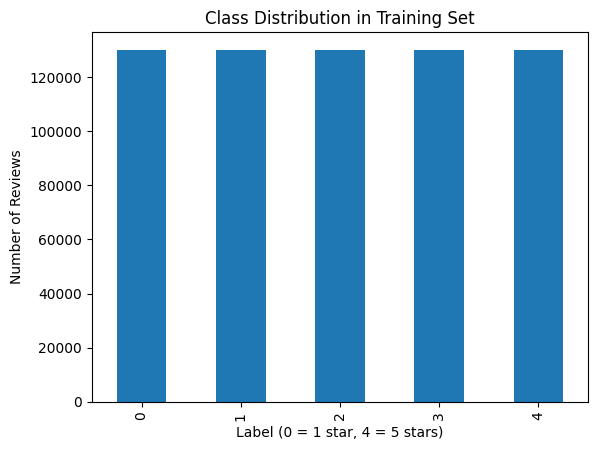

In [ ]:

train_df["label"].value_counts().sort_index()

train_df["label"].value_counts().sort_index().plot(
    kind="bar",
    title="Class Distribution in Training Set"
)
plt.xlabel("Label (0 = 1 star, 4 = 5 stars)")
plt.ylabel("Number of Reviews")
plt.show()


Review Length Analysis

Transformer models have a maximum input length (512 tokens).
We analyze review lengths to decide on truncation or chunking.

In [9]:
train_df["word_count"] = train_df["text"].apply(lambda x: len(x.split()))

train_df["word_count"].describe()


count    650000.000000
mean        134.098089
std         121.396115
min           1.000000
25%          52.000000
50%          99.000000
75%         175.000000
max        1052.000000
Name: word_count, dtype: float64

Review Length Percentiles

In [10]:
np.percentile(train_df["word_count"], [50, 75, 90, 95, 99])


array([ 99., 175., 282., 370., 601.])

Distribution of Review Lengths

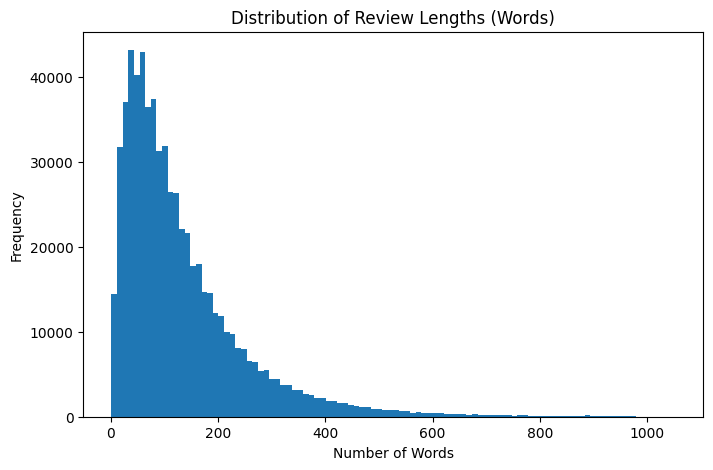

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(train_df["word_count"], bins=100)
plt.title("Distribution of Review Lengths (Words)")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()


Reviews Exceeding 512 Tokens

This motivates truncation or chunking strategies.

In [12]:
long_reviews_pct = (train_df["word_count"] > 512).mean() * 100
print(f"Percentage of reviews longer than 512 words: {long_reviews_pct:.2f}%")


Percentage of reviews longer than 512 words: 1.78%


Noise in the Dataset

We inspect text noise such as:

Excessive punctuation

Informal writing

HTML artifacts

In [13]:
for text in train_df["text"].head(15):
    if "!" in text or "?" in text or "<" in text:
        print(text[:300], "\n")


dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens 

Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has ti 

Got a letter in the mail last week that said Dr. Goldberg is moving to Arizona to take a new position there in June.  He will be missed very much.  \n\nI think finding a new doctor in NYC that you actually like might almost be as awful as trying to find a date! 

I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office